In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs = 64

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS)

In [8]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [11]:
!ls {path}

annotations  images


In [12]:
path_anno = path/'annotations'
path_img = path/'images'

In [13]:
fnames = get_image_files(path_img)

In [14]:
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_155.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Siamese_56.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bombay_111.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_11.jpg')]

In [16]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [17]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), 
                                   size=224, bs=bs).normalize(imagenet_stats)

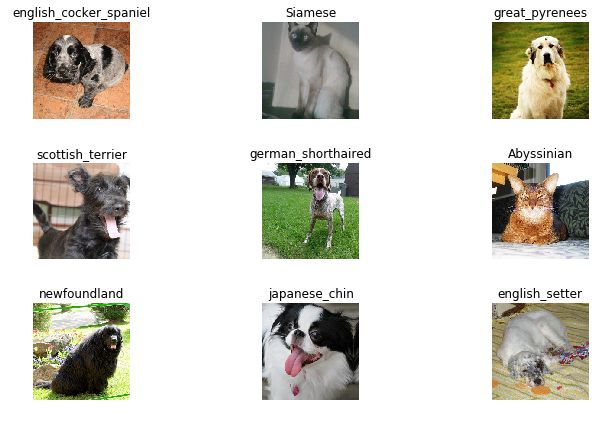

In [19]:
data.show_batch(rows=3, figsize=(10,6))

In [20]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [21]:
len(data.classes)

37

In [22]:
data.c

37

In [23]:
learn = create_cnn(data, arch=models.resnet34, metrics=error_rate)

In [24]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [25]:
learn.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate
1         1.371014    0.372915    0.112314    
2         0.554075    0.271162    0.094046    
3         0.316350    0.259857    0.085927    
4         0.252306    0.243094    0.081867    


In [28]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

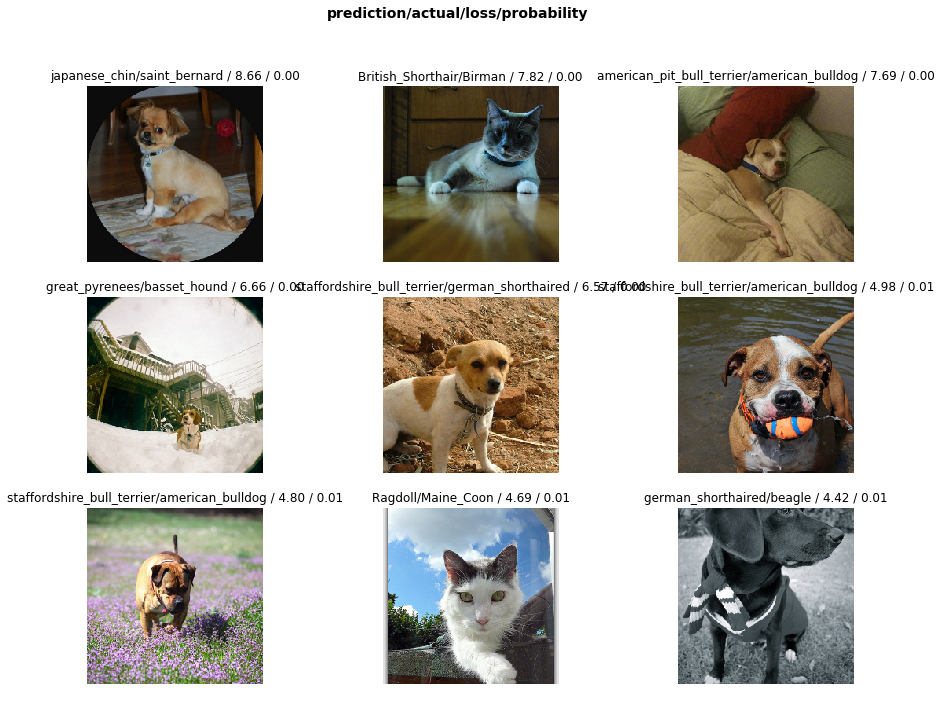

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

In [33]:
doc(interp.plot_top_losses)

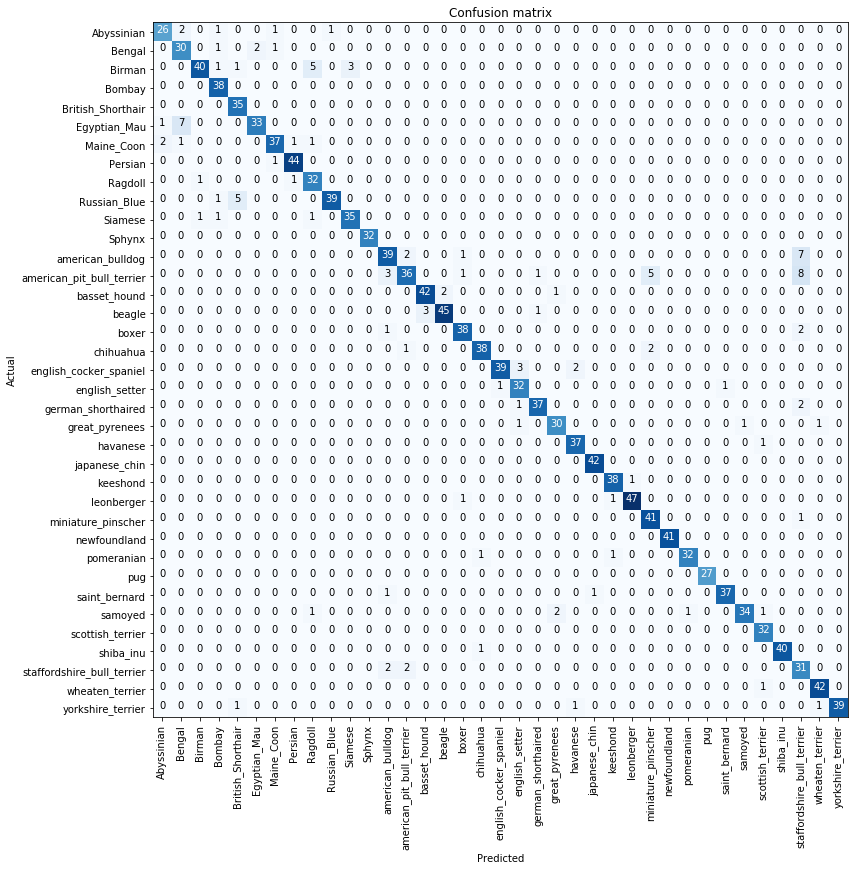

In [37]:
interp.plot_confusion_matrix(figsize=(12,12))

In [41]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 7),
 ('american_bulldog', 'staffordshire_bull_terrier', 7),
 ('Birman', 'Ragdoll', 5),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('american_pit_bull_terrier', 'miniature_pinscher', 5),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('english_cocker_spaniel', 'english_setter', 3)]

In [43]:
learn.save('stage-1')

In [44]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(1)

epoch     train_loss  valid_loss  error_rate
1         0.546553    0.353549    0.110284    


In [46]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category japanese_chin, Category British_Shorthair, Category Siamese, Category german_shorthaired, Category samoyed]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 377), Image (3, 500, 375), Image (3, 375, 500), Image (3, 500, 320), Image (3, 333, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Maine_Coon, Category beagle, Category Birman, Category Russian_Blue, Category Russian_Blue]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 500), Image (3, 500, 334), Image (3, 500, 375), Image (3, 199, 300), Image (3, 375, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Ba

In [47]:
learn.lr_find()

epoch     train_loss  valid_loss  error_rate
1         0.892878                
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


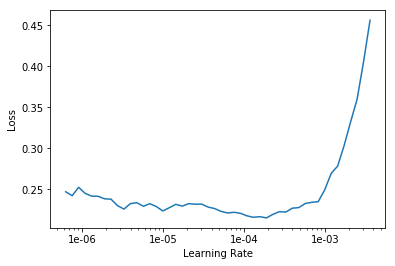

In [48]:
learn.recorder.plot()

In [49]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch     train_loss  valid_loss  error_rate
1         0.229568    0.232690    0.077808    
2         0.195543    0.225198    0.076455    


In [53]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), 
                                   bs=bs//2, size=299).normalize(imagenet_stats)

epoch     train_loss  valid_loss  error_rate
1         0.853682                
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


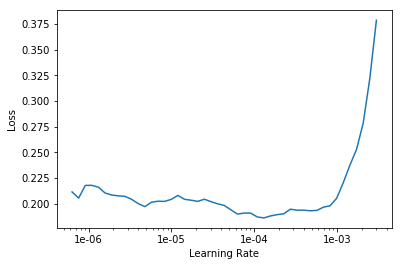

In [54]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(8)

epoch     train_loss  valid_loss  error_rate
1         0.223710    0.360690    0.108254    
2         0.450911    0.925360    0.253721    
3         0.526517    0.710184    0.200271    
4         0.378407    0.469797    0.140054    
5         0.279586    0.352650    0.110961    
6         0.171608    0.291687    0.083221    
7         0.084537    0.252531    0.069689    
8         0.052876    0.252067    0.071042    


In [56]:
learn.save('stage-1-50')

In [57]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch     train_loss  valid_loss  error_rate
1         0.037343    0.253219    0.067659    
2         0.042302    0.254924    0.071719    
3         0.036503    0.248552    0.064276    


In [58]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category japanese_chin, Category British_Shorthair, Category Siamese, Category german_shorthaired, Category samoyed]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 377), Image (3, 500, 375), Image (3, 375, 500), Image (3, 500, 320), Image (3, 333, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Maine_Coon, Category beagle, Category Birman, Category Russian_Blue, Category Russian_Blue]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 500), Image (3, 500, 334), Image (3, 500, 375), Image (3, 199, 300), Image (3, 375, 500)]...
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Ba

In [59]:
interp = ClassificationInterpretation.from_learner(learn)

In [60]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('beagle', 'basset_hound', 5),
 ('american_pit_bull_terrier', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Ragdoll', 3),
 ('english_cocker_spaniel', 'english_setter', 3)]

#### MNIST dataset

In [61]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/jupyter/.fastai/data/mnist_sample')

In [67]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

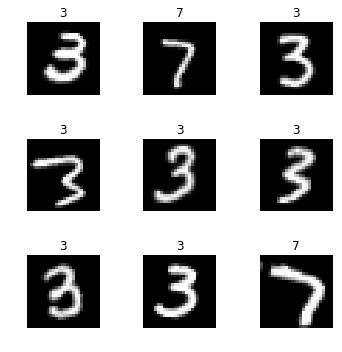

In [68]:
data.show_batch(rows=3, figsize=(5,5))

In [69]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyter/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 106937301.55it/s]


In [70]:
learn.fit(2)

epoch     train_loss  valid_loss  accuracy
1         0.162662    0.087786    0.968597  
2         0.100427    0.053136    0.983317  


In [71]:
df = pd.read_csv(path/'labels.csv')

In [72]:
!ls {path}

labels.csv  models  train  valid


In [73]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [74]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

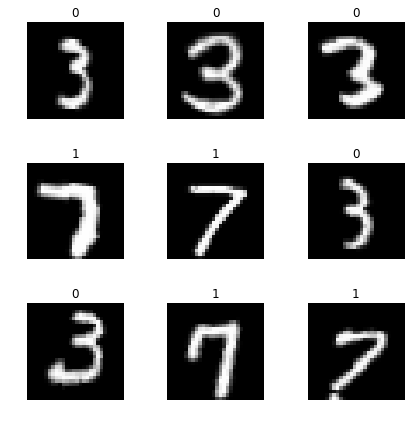

In [75]:
data.show_batch(rows=3, figsize=(6,6))

In [76]:
data.classes

[0, 1]

In [78]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [81]:
fn_paths = [path/name for name in df['name']]
fn_paths[:5]

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/21102.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/31559.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/46882.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/26209.png')]

In [82]:
pat = r'/(\d)/\d+\.png$'

In [83]:
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [84]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24, 
                                     label_func=lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [85]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [86]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']